In [1]:
import corner
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imp
apy = imp.load_source('andrew_python', '/Users/apace/Dropbox/Research/python/andrew_python.py')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from astropy.io import fits

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
from galpy.util import bovy_coords

In [3]:
def plum (r, rh, rmax):
    n = rmax**2/(r**2 + rmax**2)
    return (1.+(r/rh)**2 )**-2 / (np.pi * rh**2)/n
def mw(r, rmax):
    return 1./(np.pi*rmax**2)
def plum_ellipticity (r, rh, rmax, q):
    n = rmax**2/(r**2 + rmax**2)
    return (1.+(r/rh)**2 )**-2 / (np.pi * rh**2 * q)/n
def gauss_rmax (r, rh, rmax):
    n = 2.*(1. - np.exp(-rmax**2/2./rh**2))* np.pi*rh**2
    return np.exp(-.5 * (r/rh)**2 ) /n

In [4]:
def gc_dist(ra, dec, dist):
    gc = SkyCoord(ra=266.40498829*u.degree, dec=-28.93617776*u.degree, distance = 8.5*u.kpc, frame='icrs')
    c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, distance = dist*u.kpc, frame='icrs')

    x = (c.cartesian.x.value - gc.cartesian.x.value)**2
    y = (c.cartesian.y.value - gc.cartesian.y.value)**2
    z = (c.cartesian.z.value - gc.cartesian.z.value)**2
    d = np.sqrt(x + y + z)
    return d

In [5]:
from galpy.potential import vesc, vcirc
from galpy.potential import MiyamotoNagaiPotential, PowerSphericalPotentialwCutoff, NFWPotential
from numpy import cos, sin

  Referenced from: /anaconda3/lib/python3.6/site-packages/galpy_interppotential_c.cpython-36m-darwin.so
  Reason: image not found' 


In [6]:
MWPotential2014_2= [PowerSphericalPotentialwCutoff(normalize=0.05,alpha=1.8,rc=1.9/8.),
                  MiyamotoNagaiPotential(a=3./8.,b=0.28/8.,normalize=0.6),
                  NFWPotential(conc= 15.3*0.934975, mvir=0.8*2.)]

In [7]:
uo, vo, wo = (11.1, 232.24, 7.25)
convert =  4.74047

In [8]:
data = fits.open('../gaia_ting/atlas_v4.fits')[1].data
print(data.dtype)

(numpy.record, [('COADD_OBJECT_ID', '>i8'), ('RA', '>f8'), ('DEC', '>f8'), ('MAG_AUTO_G0', '>f8'), ('MAG_AUTO_R0', '>f8'), ('MAG_AUTO_I0', '>f8'), ('WAVG_MAG_PSF_G0', '>f8'), ('WAVG_MAG_PSF_R0', '>f8'), ('WAVG_MAG_PSF_I0', '>f8'), ('WAVG_MAGERR_PSF_G', '>f8'), ('WAVG_MAGERR_PSF_R', '>f8'), ('WAVG_MAGERR_PSF_I', '>f8'), ('FLAGS_G', '>i2'), ('FLAGS_R', '>i2'), ('IMAFLAGS_ISO_G', '>i4'), ('IMAFLAGS_ISO_R', '>i4'), ('WAVG_SPREAD_MODEL_I', '>f8'), ('WAVG_SPREADERR_MODEL_I', '>f8'), ('source_id', '>i8'), ('ra', '>f8'), ('dec', '>f8'), ('pmra', '>f8'), ('pmra_error', '>f8'), ('pmdec', '>f8'), ('pmdec_error', '>f8'), ('parallax', '>f8'), ('parallax_error', '>f8'), ('pmra_pmdec_corr', '>f4'), ('phot_g_mean_mag', '>f4'), ('phot_bp_mean_mag', '>f4'), ('phot_rp_mean_mag', '>f4'), ('del_color_cmd', '>f8'), ('del_g_cmd', '>f8'), ('del_color_cmd_bhb', '>f8'), ('del_g_cmd_bhb', '>f8'), ('cmd', '>i8'), ('del_ri_locus', '>f8'), ('mp', '>i8'), ('del_ri_dotter', '>f8'), ('ri_err', '>f8'), ('lambda', '>f8'

In [28]:
c2 = data[data['cmd'] == 1]
c3 = c2[abs(c2['del_beta']) < 1]
c3 = c3[c3['WAVG_MAG_PSF_R0'] < 19.3]
# c3 = c3[c3['WAVG_MAG_PSF_R0'] < 19.3]
# ctemp = cmag[(cmag['parallax'] - 2.*cmag['parallax_error']) < 0.]

In [29]:
ctemp = c3[(c3['parallax'] - 2.*c3['parallax_error']) < 0.]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.



In [12]:
print(len(data), len(c2), len(ctemp), len(c3),  len(ctemp))

712308 25557 1646 3548 1646


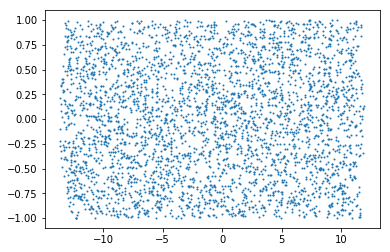

In [13]:
plt.plot(c3['lambda'], c3['del_beta'], 'o', ms=1)

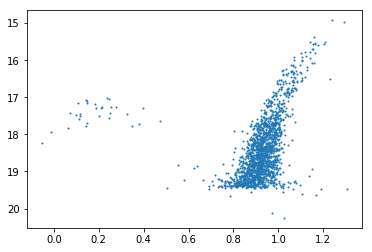

In [27]:
plt.plot(ctemp['phot_bp_mean_mag'] - ctemp['phot_rp_mean_mag'], ctemp['phot_g_mean_mag'], 'o', ms=1)
plt.gca().invert_yaxis()

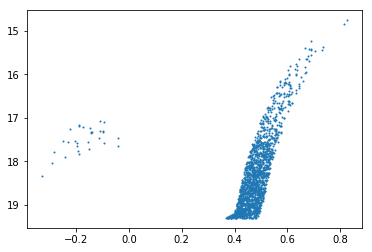

In [26]:
plt.plot(ctemp['WAVG_MAG_PSF_G0'] - ctemp['WAVG_MAG_PSF_R0'], ctemp['WAVG_MAG_PSF_R0'], 'o', ms=1)
plt.gca().invert_yaxis()

<Container object of 3 artists>

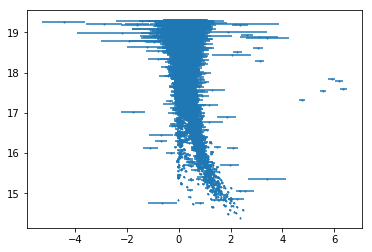

In [25]:
plt.errorbar(c3['parallax'],c3['WAVG_MAG_PSF_R0'] , xerr=c3['parallax_error'], fmt='o', ms=1)

<Container object of 3 artists>

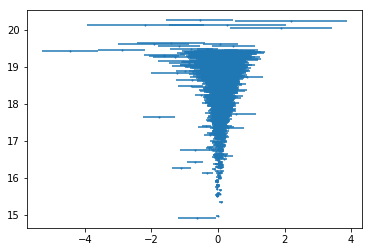

In [16]:
plt.errorbar(ctemp['parallax'],ctemp['phot_g_mean_mag'] , xerr=ctemp['parallax_error'], fmt='o', ms=1)

In [30]:
new_dt = np.dtype([('model_member', float), ('vtan', float), ('vtan_error', float),('v_escape', float),
                  ('prob_dsph_axis', float),('prob_mw', float), ('corr_error', float), ('rad_e', float), ('rad_norm', float), 
                  ('pmll_gsr', float), ('pmbb_gsr', float), ('pmbb_gsr_error', float), ('pmll_gsr_error', float) ]
                  + data.dtype.descr)

c3 = np.zeros(ctemp.shape, dtype=new_dt)
for kk in ctemp.dtype.names:
    c3[kk] = ctemp[kk]
print (len(c3))

1646


In [31]:
dist = 25.

In [32]:
n= 1000
for i in range(len(c3)):
    dgc = gc_dist(c3[i]['ra'] , c3[i]['dec'], 25. )

    l, b = bovy_coords.radec_to_lb(c3[i]['ra'] , c3[i]['dec'],degree=True)

    ve2 = vesc(MWPotential2014_2,dgc/8.)*220.
    
    means = [c3[i]['pmra'],c3[i]['pmdec']]
    corr = c3[i]['pmra_pmdec_corr'] * c3[i]['pmra_error']*c3[i]['pmdec_error']
    covs = [[c3[i]['pmra_error']**2          , corr], 
        [corr,           c3[i]['pmdec_error']**2]] 
#         n = 2000
    m = np.random.multivariate_normal(means, covs, n)
    pmll = np.zeros(n)
    pmbb = np.zeros(n)
    for ishit in range(len(pmll)):
        x = bovy_coords.pmrapmdec_to_pmllpmbb(m.T[0][ishit], m.T[1][ishit],c3[i]['RA'] , c3[i]['DEC'],degree=True)
        pmll[ishit] = x[0]
        pmbb[ishit] = x[1]
    t1 = convert*dist*pmll - uo*np.sin(l*np.pi/180.) + vo*cos(l*np.pi/180.)
    t2 = convert*dist*pmbb -uo*np.cos(l*np.pi/180.)*np.sin(b*np.pi/180.)-vo*np.sin(l*np.pi/180.)*np.sin(b*np.pi/180.)+wo*np.cos(b*np.pi/180.)

    temp_t1 = corner.quantile(t1, [.5, .1587, .8413], )
    temp_t2 = corner.quantile(t2, [.5, .1587, .8413], )

    vtan = np.sqrt(t1**2 + t2**2)
    vtan_mean = np.mean(vtan)
    vtan_std = np.std(vtan)
    
    c3['pmll_gsr'][i] = temp_t1[0]
    c3['pmbb_gsr'][i] = temp_t2[0]
    c3['pmll_gsr_error'][i] = (temp_t1[2]-temp_t1[1])/2.
    c3['pmbb_gsr_error'][i] = (temp_t2[2]-temp_t2[1])/2.
    c3['vtan'][i] = vtan_mean
    c3['vtan_error'][i] = vtan_std
    c3['v_escape'][i] = ve2
    c3['corr_error'][i] = corr

In [33]:
rmax = np.max(c3['lambda']) - np.min(c3['lambda'])
rh = 0.24

for i in range(len(c3)):
    c3['prob_dsph_axis'][i] = gauss_rmax(c3['del_beta'][i] , rh, rmax/2.)
    c3['prob_mw'][i] = 1./( rmax )

In [35]:
c3_vel = c3[c3['vtan'] - 3.*c3['vtan_error'] < c3['v_escape']]
print(len(c3), len(c3_vel))
cut1 = c3_vel
# cut3 = c3_vel[c3_vel['WAVG_MAG_PSF_R0'] < 19.5]
# cut3 = cut3[cut3['mp'] == 1]
# print(len(cut1), len(cut3))

1646 811


In [36]:
for_out2 = []
ckeep = cut1
for i in range(len(ckeep)):
    for_out2.append([ckeep[i]['pmra'], ckeep[i]['pmdec'], ckeep[i]['pmra_error'], ckeep[i]['pmdec_error'],
                   ckeep[i]['corr_error'], ckeep[i]['prob_dsph_axis'], ckeep[i]['prob_mw'], 1.0, 0., ckeep['COADD_OBJECT_ID'][i], 
                   ckeep['source_id'][i]])
apy.out_data('runs_other/atlas_v4.dat', for_out2, length=True)

In [47]:
for_out2 = []
ckeep = cut1
for i in range(len(ckeep)):
    for_out2.append([ckeep[i]['pmra'], ckeep[i]['pmdec'], ckeep[i]['pmra_error'], ckeep[i]['pmdec_error'],
                   ckeep[i]['corr_error'], ckeep[i]['prob_dsph_axis'], ckeep[i]['prob_mw'], 1.0, 0., ckeep['COADD_OBJECT_ID'][i], 
                   ckeep['source_id'][i], ckeep['beta'][i], ckeep['lambda'][i]])
apy.out_data('runs_other/atlas_v4_sc.dat', for_out2, length=True)

In [48]:
len(for_out2[0])

13

In [44]:
from astropy import table

In [77]:
tab = table.Table(ckeep)

In [39]:
member_file = np.loadtxt('runs_other/atlas_v4.mem')

In [54]:
member_file2 = np.loadtxt('runs_other/atlas_v4_pmgrad.mem')

In [50]:
np.sum(member_file)

131.58179471454645

In [55]:
np.sum(member_file2)

135.92040051473887

In [42]:
for kk in range(len(ckeep)):
#     tab['model_member'][kk] = member_file[kk]
    ckeep['model_member'][kk] = member_file[kk]

In [56]:
for kk in range(len(ckeep)):
#     tab['model_member'][kk] = member_file[kk]
    ckeep['model_member'][kk] = member_file[kk]

In [45]:
tab = table.Table(ckeep)

In [46]:
tab.write('runs_other/atlas_v4.fits')

In [57]:
tab.write('runs_other/atlas_v4_pmgrad.fits')

In [86]:
np.save('runs_other/atlas_v3.npy', ckeep)

In [2]:
import numpy as np

n=7
d2 = np.loadtxt('atlas_v4', usecols=range(0,n+1))


In [4]:
import pyfits
a2 = pyfits.open('atlas_v4_pmgrad.fits')[1].data

In [7]:
a2['lambda'].max()

11.808465857986214

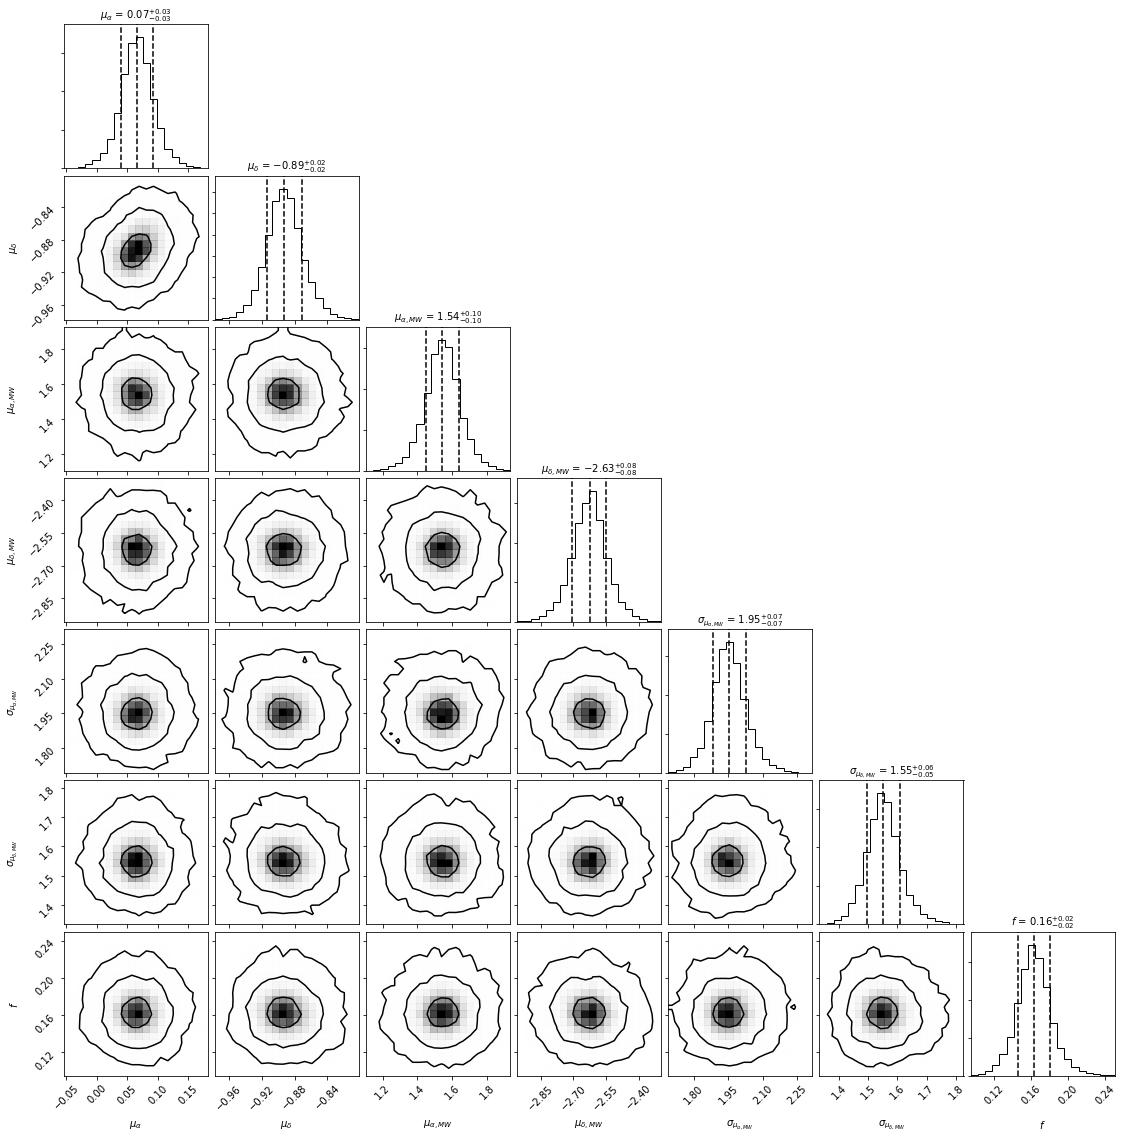

In [20]:
import corner
import matplotlib.pyplot as plt

import numpy as np

n=7
d2 = np.loadtxt('atlas_v4', usecols=range(0,n+1))

mcmc_data_cut = np.array([i for i in d2 if i[0]>1e-8])
# mcmc_data_cut = np.array([i for i in d2 if i[0] < -1.5])
mcmc_normal = mcmc_data_cut.T[1:].T
mcmc_normal = []
for i in mcmc_data_cut:
    mcmc_normal.append([i[1], i[2], i[3], i[4],  pow(10., i[5]), pow(10., i[6]), 1. - i[7] ])
mcmc_normal = np.array(mcmc_normal)
bins = [20]*len(mcmc_normal.T)

figure = corner.corner(mcmc_normal,
                       labels=[r'$\mu_\alpha$', r'$\mu_\delta$', r'$\mu_{\alpha, MW}$',
                              r'$\mu_{\delta, MW}$', r'$\sigma_{\mu_{\alpha, MW}}$', r'$\sigma_{\mu_{\delta, MW}}$',
                              r'$f$'],
                       quantiles=[0.16, 0.50, 0.84],# weights=mcmc_data_cut.T[0],
                       show_titles=True, title_kwargs={"fontsize": 10}, 
                       plot_datapoints = False,
                       levels=[ 0.393469, 0.864665, 0.988891],
                       bins = bins
#                        label_kwargs = dict(fontsize = 17)
                      )
#plt.savefig('runs_other/atlas_v4.png')
plt.show()

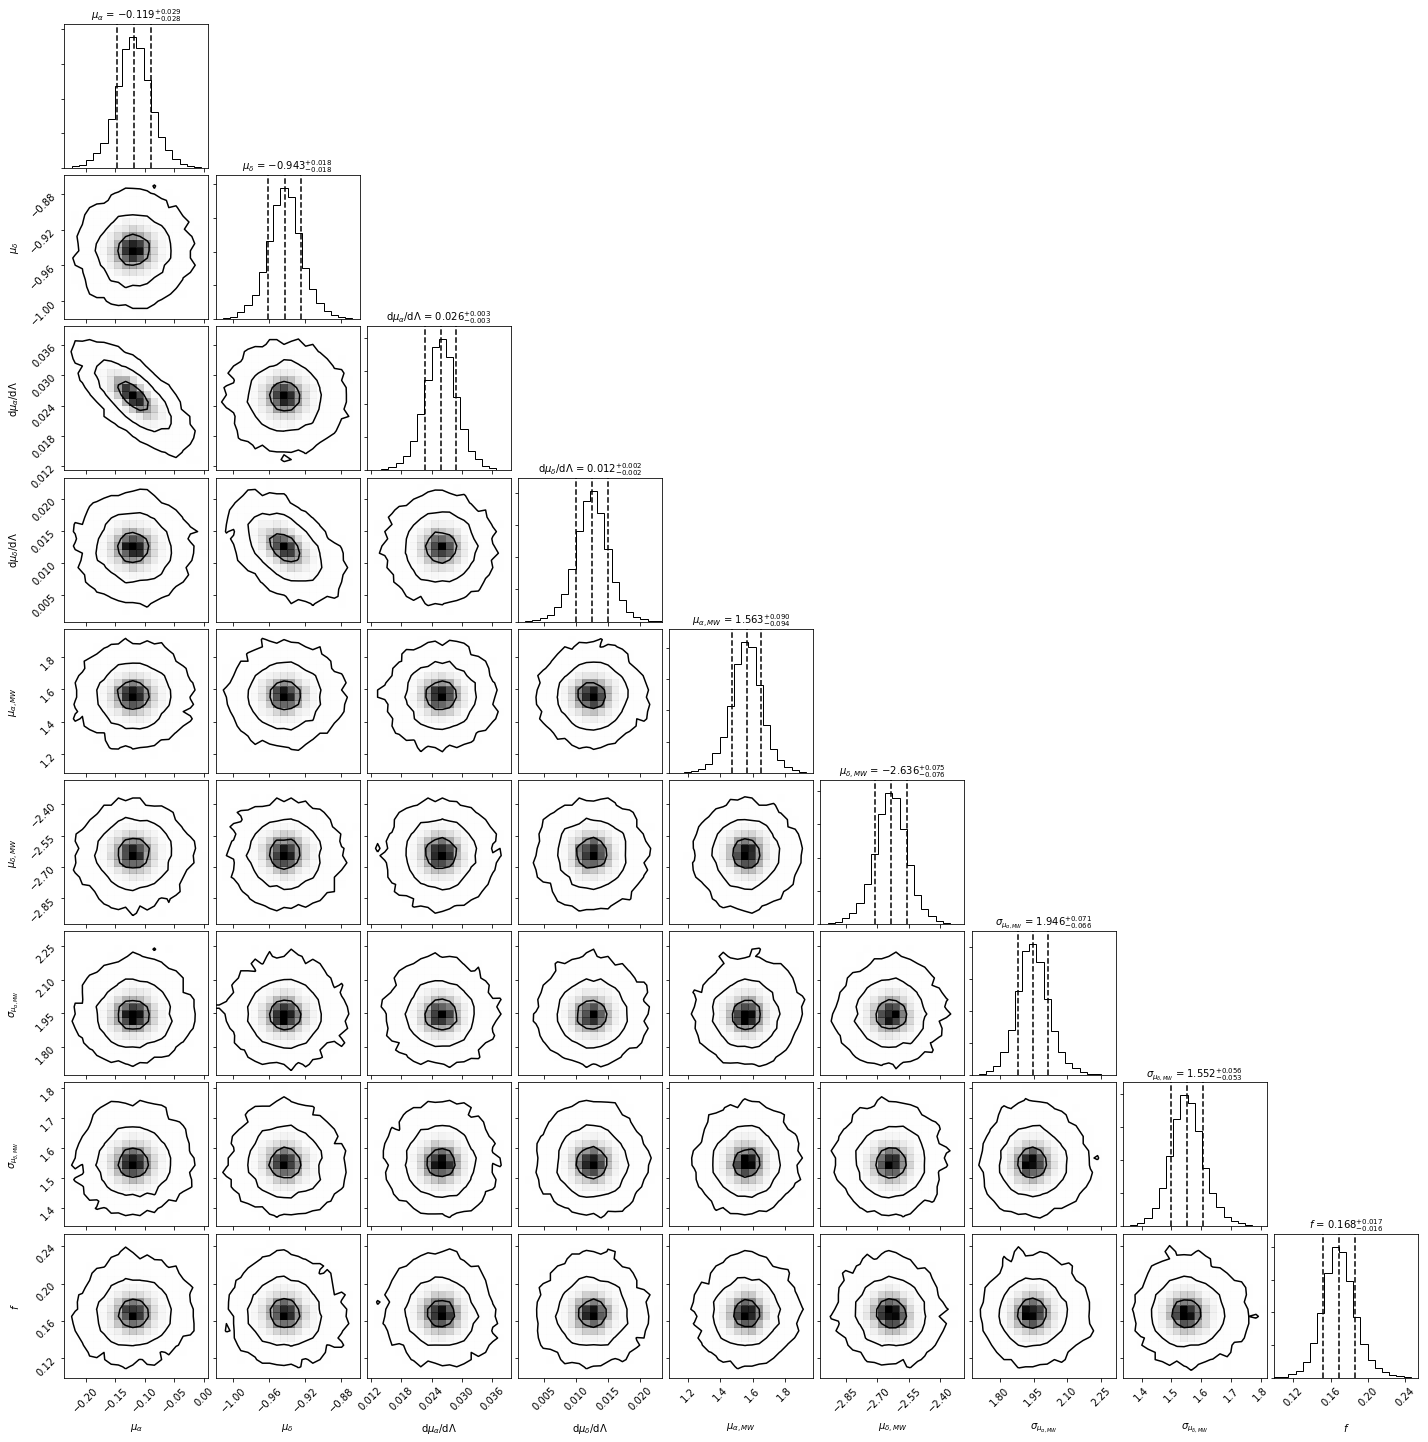

In [21]:
n=9
d2 = np.loadtxt('atlas_v4_pmgrad', usecols=range(0,n+1))

mcmc_data_cut = np.array([i for i in d2 if i[0]>1e-8])
# mcmc_data_cut = np.array([i for i in d2 if i[0] < -1.5])
mcmc_normal = mcmc_data_cut.T[1:].T
mcmc_normal = []
for i in mcmc_data_cut:
    mcmc_normal.append([i[1], i[2], i[3], i[4], i[5], i[6],  pow(10., i[7]), pow(10., i[8]), 1. - i[9] ])
mcmc_normal = np.array(mcmc_normal)
bins = [20]*len(mcmc_normal.T)

figure = corner.corner(mcmc_normal,
                       labels=[r'$\mu_\alpha$', r'$\mu_\delta$', r'${\rm d}\mu_{\alpha}/{\rm d}\Lambda$',r'${\rm d}\mu_{\delta}/{\rm d}\Lambda$',
                               r'$\mu_{\alpha, MW}$',
                              r'$\mu_{\delta, MW}$', r'$\sigma_{\mu_{\alpha, MW}}$', r'$\sigma_{\mu_{\delta, MW}}$',
                              r'$f$'],
                       quantiles=[0.16, 0.50, 0.84],# weights=mcmc_data_cut.T[0],
                       show_titles=True, title_kwargs={"fontsize": 10}, 
                       plot_datapoints = False,
                       levels=[ 0.393469, 0.864665, 0.988891],
                       bins = bins,
                       title_fmt=".3f" 
#                        label_kwargs = dict(fontsize = 17)
                      )
#plt.savefig('runs_other/atlas_v4_pmgrad.png')
plt.show()